# Epidemiología: Modelo SIR

Este modelo representa la evolución de una epidemia que se expande en una población fija. Evaluaremos la efectividad de diversas intervenciones. Más detalles se pueden encontrar en el trabajo de [Smith and Moore (2001)](https://maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-introduction)

## El modelo Kermack-McKendrick

El modelo denominado *SIR* se aplica a una población finita de individuos, que desarrollan una enfermedad de la cual se pueden recuperar de forma natural tras un tiempo de desarrollo de la enfermedad. Este el caso de enfermedades comunes, como la gripe estacional. Tenemos tres tipos de individuos:

-   *S*: Personas "susceptibles", o sea, aquellas que pueden contraer la enfermedad si entran en contacto con un infectado.

-   *I*: Personas "infectadas", o sea, aquellas que sufren la enfermedad y pueden pasar la enfermedad a un susceptible si entran en contacto con él. 

-   *R*: Personas "recuperadas", personas que han pasado la enfermedad y que no la van a tener nuevamente.  

Supóngase una población fija de $N$ individuos, de los cuales tenemos una fracción $s$, $i$ y $r$ de susceptibles, infectados y recuperados, respectivamente. Entonces $s+i+r=1$. 

Veamos cómo evolucionan estas variables. Supóngase que un individuo susceptible necesita en media $T_s$ días para entrar en contacto con toda la población. Entonces podemos asumir que cada día entra en contacto con $\beta_s N=1/T_s N$ individuos, de los cuales una fracción $i$ están infectados. Entonces, dado que $sN$ es el número de individuos susceptibles, el número de contactos de esos individuos con infectados cada día es de $\beta_s N i sN$. Si la probabilidad de ser infectado por cada contacto es $\beta_i$, entonces el número de nuevos infectados cada día es de $\beta_i \beta_s N i sN$.

¿Cómo se recuperan los infectados? Si el número de días de recuperacion es de $T_r$, entonces podemos asumir que cada día se recuperan $\gamma=1/T_r$ individuos. Por tanto, el total de individuos que se recuperan cada día es de $\gamma i N$.

Por tanto:

-   The número de nuevos infectados cada día es $\beta_i \beta_s N i sN$. Dividiendo por el número total de individuos $N$, tenemos que la fracción diaria de infectados cada día es de $\beta_i \beta_s N i s$. Por simplicidad en la notación, definimso $\beta= \beta_i \beta_s N$, por lo que la tasa de nuevos infectados cada día es $\beta s i$.

-   The número de individuos que se recuperan cada día es de $\gamma i N$. Dividiendo por el total de individuos $N$ tenemos que la tasa de recuperaciones cada día es de $\gamma i$.

Las siguientes ecuaciones determinan la evolución de la tasa de susceptibles, infectados y recuperados cada día: 


$$\begin{aligned}
\frac{ds}{dt} &= -\beta s i \\
\frac{di}{dt} &= \beta s i - \gamma i\\
\frac{dr}{dt} &= \gamma i\end{aligned}$$ 


### Ejercicio 1

Simular el modelo asumiendo unas condiciones iniciales y parámetros dados. 

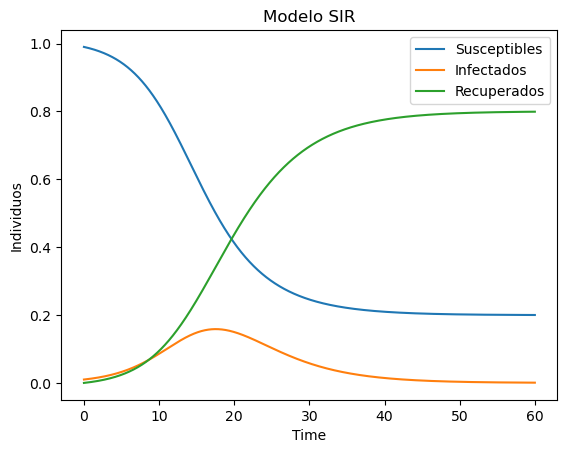

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""" definición del modelo"""

def sys(x, t, beta, gamma):
    dsdt=-beta*x[0]*x[1] #rate of change of susceptible 
    didt=beta*x[0]*x[1]-gamma*x[1]  #rate of change of infected
    drdt=gamma*x[1]  #rate of change of infected
    return np.array([dsdt, didt, drdt])


"""" definición del intervalo de tiempo"""

timestep = 0.01 
t0=0
tf=60
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))


"""" definición de los parámetros"""
re = 5          # number of encounters per day
ri = 0.1             # rate of infection 
tr = 4             # recovery time in days
beta = re*ri      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day


"""" valores iniciales de las variables de estado"""
s0 = 0.99  # datos iniciales de suceptibles 
i0=0.01 # datos iniciales de infectados
r0=0 # datos iniciales de recuperados
x0 = np.array([s0, i0, r0])

"""" aplicando el método de euler"""

def solveODE_euler(f, x0, t, arg=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], *arg)
    return x

sol = solveODE_euler(sys, x0, t,  arg=(beta, gamma))


""""gráficas"""

s_sim=sol[:,0]
i_sim=sol[:,1]
r_sim=sol[:,2]

# visualization
plt.plot(t, s_sim, label = 'Susceptibles')
plt.plot(t, i_sim, label = 'Infectados')
plt.plot(t, r_sim, label = 'Recuperados')
plt.xlabel('Time')
plt.ylabel('Individuos')
plt.legend()
plt.title('Modelo SIR')
plt.show()


### Ejercicio 2

El parámetro $\beta$ se refiere a la tasa de contactos entre infectados y susceptibles, por lo que actuar sobre él se refiere a la implementación de medidas de alejamiento entre los individuos, como cuarentenas, etc. El parámetro $\gamma$ se refiere a la tasa de recuperación diaria, por lo que se refiere a medidas de acortamiento del proceso patológico.

Estudiar las sensibilidad de los parámetros ($\beta$ y $\gamma$) sobre el número máximo de infectados durante la epidemia, dadas las condiciones iniciales y valores de los parámetros determinadas anteriormente.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


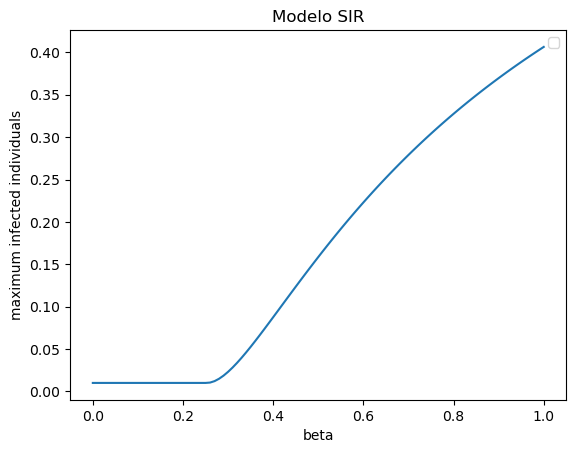

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


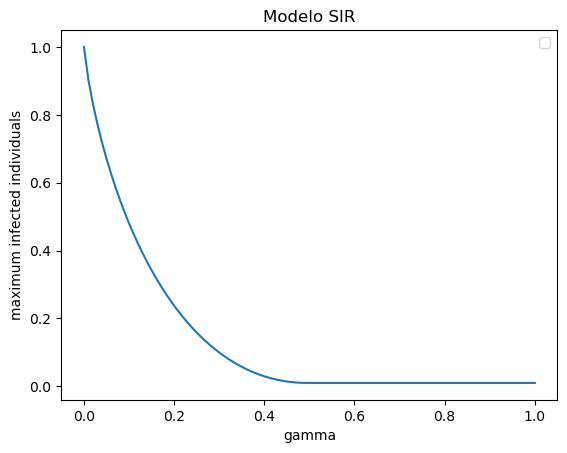

In [13]:
#sensibilidad del beta
beta_array = np.linspace(0, 1, 101)
gamma=1/tr

def sweep_beta(beta_array, gamma):
    sweep = pd.Series()
    for beta in beta_array:
        sol = solveODE_euler(sys, x0, t,  arg=(beta, gamma))
        sweep[beta] = max(sol[:,1])
    return sweep

infected_sweep = sweep_beta(beta_array, gamma)

# visualization of beta effect
plt.plot(beta_array, infected_sweep)
plt.xlabel('beta')
plt.ylabel('maximum infected individuals')
plt.legend()
plt.title('Modelo SIR')
plt.show()


#sensibilidad del gamma
beta=0.5
gamma_array=np.linspace(0, 1, 101)

def sweep_gamma(beta, gamma_array):
    sweep = pd.Series()
    for gamma in gamma_array:
        sol = solveODE_euler(sys, x0, t,  arg=(beta, gamma))
        sweep[gamma] = max(sol[:,1])
    return sweep

infected_sweep = sweep_gamma(beta, gamma_array)

# visualization of beta effect
plt.plot(gamma_array, infected_sweep)
plt.xlabel('gamma')
plt.ylabel('maximum infected individuals')
plt.legend()
plt.title('Modelo SIR')
plt.show()


### Ejercicio 3

Representar el número acumulado final de infectados (variable recuperados) en función de los parámetros $\beta$ y $\gamma$ representar en la misma gráfica distintos valores de $\beta$ y $\gamma$ (por medio de la representación de diversas curvas o por medio de un **heatmap**).  

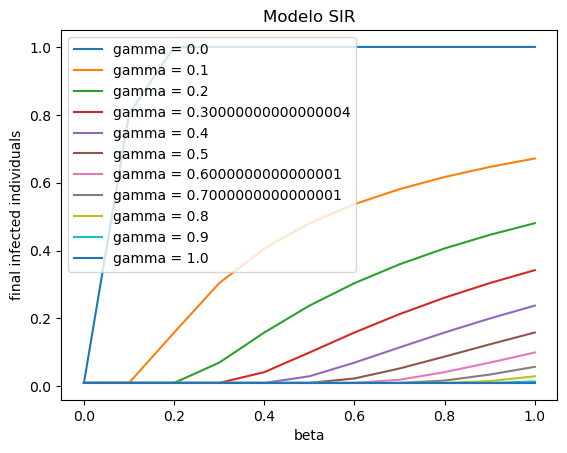

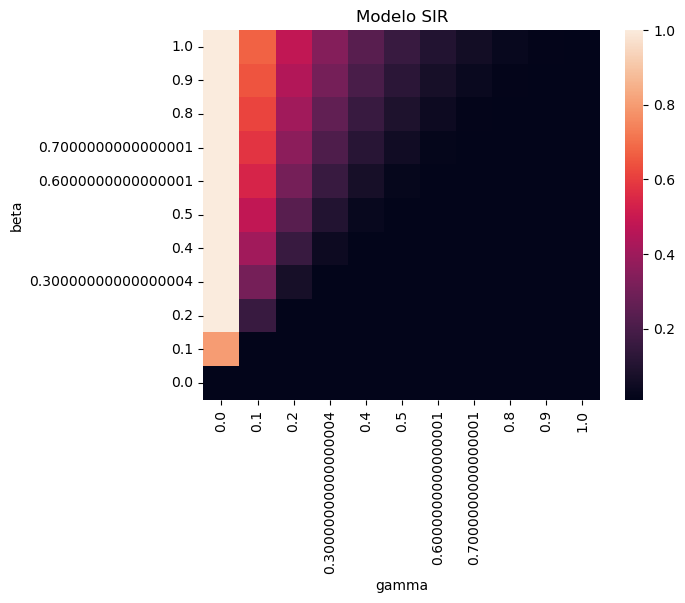

In [22]:
import warnings
warnings.filterwarnings('ignore')

#sensibilidad del beta con el gamma
gamma_array = np.linspace(0, 1, 11)
beta_array = np.linspace(0, 1, 11)


def sweep_parameters(beta_array, gamma_array):
    frame = pd.DataFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta(beta_array, gamma)
    return frame

frame_param=sweep_parameters(beta_array, gamma_array)

# visualization of both effects
for gamma in gamma_array:
    label = f'gamma = {gamma}'
    frame_param[gamma].plot(label=label)
plt.xlabel('beta')
plt.ylabel('final infected individuals')
plt.legend()
plt.title('Modelo SIR')
plt.show()

#heatmap
import seaborn as sns

hm=sns.heatmap(frame_param, annot=False)
hm.invert_yaxis()
plt.xlabel('gamma')
plt.ylabel('beta')
plt.title('Modelo SIR')
plt.show()


### Ejercicio 4

Estudiar la evolución de la enfermedad cuando se implementa una medida de inmunización. Esta medida asume que una parte de la población susceptible se extrae cada día en una nueva variable de estado llamada *inmunizados*. Estudiar el efecto de la tasa diaria de inmunización sobre el total de infectados por la enfermedad. 

Entonces, además de los tres tipos de individuos anteriores (S, I y R), incorporamos uno nuevo, que es el de Inmunizados (E). Esta variable se define como: 

-   *E*: Personas "inmunizadas". Personas susceptibles a las que se le ha inoculado una vacuna y pasan a ser directamente recuperadas, sin pasar por la enfermedad. 

Como anteriormente, definimos las ecuaciones a partir de la proporción de la población en cada grupo. Supóngase que cada día se vacuna a una tasa $\delta$ de la población susceptible. Por tanto, las ecuaciones del modelo SIR serían las siguientes: 

$$\begin{aligned}
\frac{ds}{dt} &= -\beta s i -\delta s \\
\frac{di}{dt} &= \beta s i - \gamma i\\
\frac{dr}{dt} &= \gamma i + \delta s \\
\frac{dr_i}{dt} &= \gamma i,\end{aligned}$$ 

donde hemos añadido una nueva variable $r_i$ que contabiliza los recuperados no inmunizados que han pasado por la infección.

Seguidamente simulamos este modelo, comparando los resultados con los del caso anterior. En primer lugar implementamos las ecuaciones. 

In [25]:
"""" definición del modelo"""

def sys1(x, t, beta, gamma):
    dsdt=-beta*x[0]*x[1] #rate of change of susceptible 
    didt=beta*x[0]*x[1]-gamma*x[1]  #rate of change of infected
    drdt=gamma*x[1]  #rate of change of recovered
    return np.array([dsdt, didt, drdt])

def sys2(x, t, beta, gamma,delta):
    dsdt=-beta*x[0]*x[1]-delta*x[0] #rate of change of susceptible 
    didt=beta*x[0]*x[1]-gamma*x[1]  #rate of change of infected
    drdt=gamma*x[1]+delta*x[0]  #rate of change of recovered plus vaccinated 
    dridt = gamma*x[1] #rate of change of infected recovered
    return np.array([dsdt, didt, drdt, dridt])

Seguidamente definimos el tiempo de simulación, el tiempo de paso, los valores de los parámetros y las condiciones iniciales:

In [28]:
"""" definición del intervalo de tiempo"""

timestep = 0.01 
t0=0
tf=60
t = np.linspace(t0, tf, int((tf-t0)/timestep+1))


"""" definición de los parámetros"""
re = 5          # rate of encounters
ri = 0.1             # rate of infection 
tr = 4             # recovery time in days
beta = re*ri      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day
delta= 0.01         # tasa de inmunización


"""" valores iniciales de las variables de estado"""
s0 = 0.99  # datos iniciales de suceptibles 
i0=0.01 # datos iniciales de infectados
r0=0 # datos iniciales de recuperados
ri0=0 #infectados acumulados
x0_1 = np.array([s0, i0, r0])
x0_2 = np.array([s0, i0, r0,ri0])

Por último, simulamos el modelo aplicando el método de Euler y representamos la trayectoria de los infectados en cada uno de los modelos.

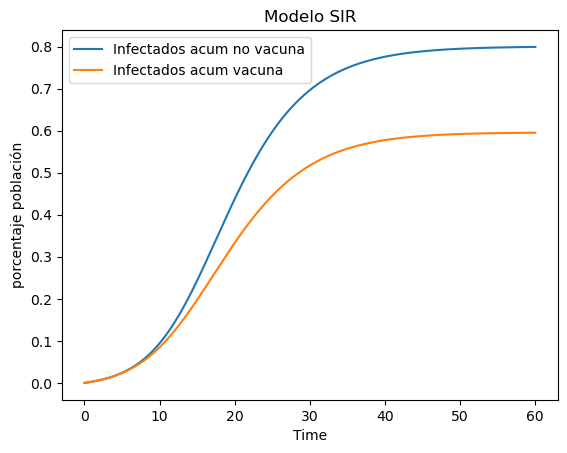

Porcentaje infectados en población sin vacuna: 0.799114545733334
Porcentaje infectados en población con vacuna: 0.5950725688392444
Porcentaje vacunación diaria: 0.01


In [31]:
"""" aplicando el método de euler"""

def solveODE_euler(f, x0, t, arg=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        x[i+1] = x[i] + (t[i+1] - t[i]) * f(x[i], t[i], *arg)
    return x

sol = solveODE_euler(sys1, x0_1, t,  arg=(beta, gamma))
sol_im = solveODE_euler(sys2, x0_2, t,  arg=(beta, gamma, delta))


""""gráficas"""

s_sim=sol[:,0]
i_sim=sol[:,1]
r_sim=sol[:,2]

sim_sim=sol_im[:,0]
iim_sim=sol_im[:,1]
rim_sim=sol_im[:,2]
riim_sim=sol_im[:,3]

# visualization of glucose concentration
plt.plot(t, r_sim, label = 'Infectados acum no vacuna')
plt.plot(t, riim_sim, label = 'Infectados acum vacuna')
plt.xlabel('Time')
plt.ylabel('porcentaje población')
plt.legend()
plt.title('Modelo SIR')
plt.show()

print('Porcentaje infectados en población sin vacuna:',r_sim[-1])
print('Porcentaje infectados en población con vacuna:', riim_sim[-1])
print('Porcentaje vacunación diaria:', delta)

La vacunación ha supuesto el descenso de aproximadamente un 20% de la población que ha pasado por la enfermedad. El porcentaje acumulado de población vacunada es del 23%. 

Podemos también observar el efecto de la tasa de vacunación $\delta$ sobre el total de infectados después que pase la enfermedad. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


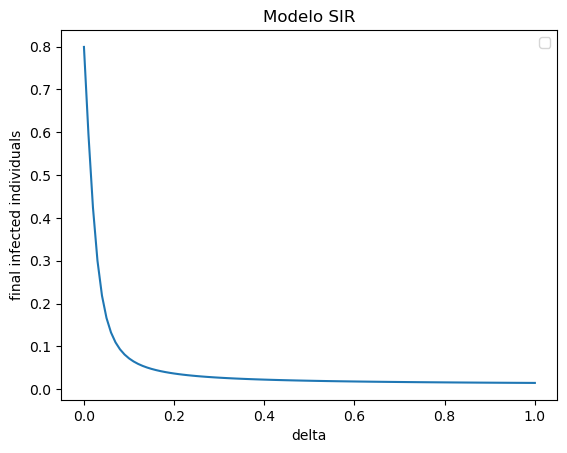

In [34]:
#sensibilidad de delta
delta_array = np.linspace(0, 1, 101)

def sweep_delta(delta_array, beta, gamma):
    sweep = pd.Series(dtype="float64")
    for delta in delta_array:
        sol = solveODE_euler(sys2, x0_2, t,  arg=(beta, gamma,delta))
        sweep[delta] = sol[:,3][-1]
    return sweep

infected_sweep = sweep_delta(delta_array, beta, gamma)

# visualization of beta effect
plt.plot(delta_array, infected_sweep)
plt.xlabel('delta')
plt.ylabel('final infected individuals')
plt.legend()
plt.title('Modelo SIR')
plt.show()

Obsérvese que a medida que la tasa de inmunización crece, el porcentaje de infectados decrece abruptamente. A partir de un 20% de tasa diaria de vacunación, la tasa final de infectados es muy baja. Esta situación se la conoce como *inmunidad de rebaño*, en la cual la tasa de población recuperada es tal que la enfermedad no se desarrolla. 

Por otro lado, hay que tener en cuenta que si la tasa de vacunación diaria es menor al 10%, la tasa de infección sube muy pronunciadamente y las medidas de vacunación no son efectivas.